In [113]:
import qubic.toolchain as tc
import qubic.run as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
import chipcalibration.ramsey as gordon
from importlib import reload
import qubic.state_disc as sd

In [2]:
# instantiate runner and load xsa file (i.e. PL bitfile)
# use load_xsa=False if you don't want to reload bitfile
runner = rc.CircuitRunner()

In [174]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
qchip = qc.QChip('../submodules/qchip/X4Y2/X4Y2_rabi_amp_cal.json')
chanmap = {'Q0':2,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':7}

channel_config = load_channel_configs('../submodules/qchip/X4Y2/channel_config.json')

In [175]:
target_qubits = ['Q2'] #['Q0', 'Q1', 'Q2', 'Q3']

In [176]:
reload(gordon)
delayTime = np.linspace(0, 5.e-6, 100)
opt = gordon.RamseyOptimize(target_qubits,delayTime,qchip, fpga_config, channel_config)


done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


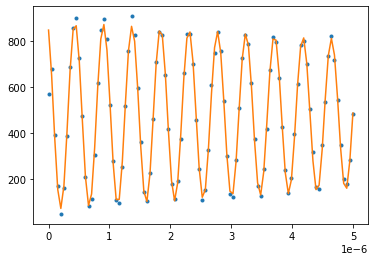

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


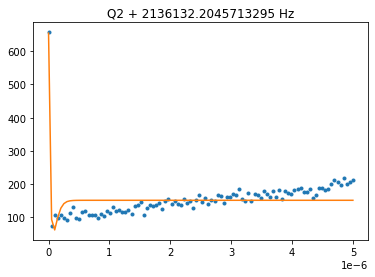

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


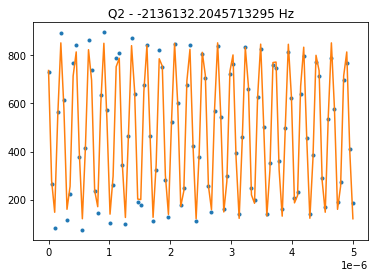

({'Q2': (array([ 1.55948335e+05,  1.51485235e+02,  1.38078241e+04, -1.56757167e+00,
           4.44729191e-08]),
   array([[ 1.40868822e+19,  1.73605472e+09, -1.25771065e+18,
           -2.93725251e+11, -4.15780441e+01],
          [ 1.73605472e+09,  1.04282697e+01, -1.54999140e+08,
           -3.61985043e+01, -2.10958207e-09],
          [-1.25771065e+18, -1.54999140e+08,  1.12291425e+17,
            2.62244953e+10,  3.71217651e+00],
          [-2.93725251e+11, -3.61985043e+01,  2.62244953e+10,
            6.12445833e+03,  8.66942675e-07],
          [-4.15780441e+01, -2.10958208e-09,  3.71217651e+00,
            8.66942676e-07,  1.66645136e-16]]))},
 {'Q2': (array([ 3.65904017e+02,  4.86160360e+02,  4.27504922e+06, -8.15727191e-01,
          -3.58500467e+02]),
   array([[ 2.27153834e+01,  1.30945889e-01,  4.93702528e+02,
            8.99665953e-03, -8.40645409e+08],
          [ 1.30945889e-01,  7.03678850e+00, -1.12369645e+01,
           -7.07359317e-04, -4.01350140e+06],
          [ 4.

In [177]:
opt.run_optimize_step(runner, 1000, {q: [720, 500, 1/.6e-6, 0, 1.5e-5] for q in target_qubits})

In [178]:
print(opt.initial_ramsey.fit_params['Q2'][0])
opt.update_qubit_freq('Q2', 1, qchip)

[ 4.09805003e+02  4.79675515e+02  2.13613220e+06 -4.59179113e-01
  2.18766597e-05]


In [179]:
qchip.save('X4Y2_Q2_ramsey.json')
qchip_old = qc.QChip('../submodules/qchip/X4Y2/X4Y2_rabi_amp_cal.json')

qchip.qubits['Q2'].freq - qchip_old.qubits['Q2'].freq

2136132.204571724

In [180]:
#now measure T2 with updated qchip
delayTime = np.linspace(0, 30.e-6, 100)
sram = gordon.Ramsey(target_qubits, delayTime, qchip, fpga_config, channel_config)

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


In [181]:
sram.run(runner, 1000)

In [184]:
sram.fit_ramsey_freq({q: [720, 500, 0, 0, 1.5e-5] for q in target_qubits}, use_fft=False)

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


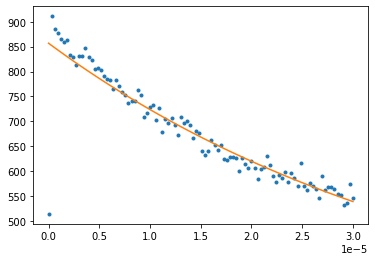

In [185]:
sram.plot_fits('Q2')